In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, cohen_kappa_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score

In [343]:
import pandas as pd

data= pd.read_csv('online_shoppers_intention.csv')

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [344]:
data_cat=data[['Month','Region','Browser','OperatingSystems','Weekend','Revenue','TrafficType','VisitorType','SpecialDay']]
data_num=data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]

In [345]:
#sns.pairplot(data_num , diag_kind ='kde')

In [346]:
data_num

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000
...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000


### Label Encoding of Ordinal Categorical Columns

In [347]:
from sklearn import preprocessing

In [348]:
le=preprocessing.LabelEncoder()

In [349]:
data_cat_le=data_cat[['SpecialDay']].apply(le.fit_transform)

In [350]:
data_cat_le['SpecialDay'].value_counts()

0    11079
3      351
4      325
2      243
1      178
5      154
Name: SpecialDay, dtype: int64

### Encoding of Nominal Categorical Columns

In [351]:
data_cat = data_cat.drop(['SpecialDay'],  axis=1)

In [352]:
data_cat_dum = pd.get_dummies(data_cat, drop_first=True)

In [353]:
data_cat_dum.columns

Index(['Region', 'Browser', 'OperatingSystems', 'Weekend', 'Revenue',
       'TrafficType', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [354]:
data_cat_dum.dtypes

Region                           int64
Browser                          int64
OperatingSystems                 int64
Weekend                           bool
Revenue                           bool
TrafficType                      int64
Month_Dec                        uint8
Month_Feb                        uint8
Month_Jul                        uint8
Month_June                       uint8
Month_Mar                        uint8
Month_May                        uint8
Month_Nov                        uint8
Month_Oct                        uint8
Month_Sep                        uint8
VisitorType_Other                uint8
VisitorType_Returning_Visitor    uint8
dtype: object

In [355]:
data_cat_dum['Weekend'].replace (False,0, inplace = True)

In [356]:
data_cat_dum['Weekend'].value_counts()

0.0    9462
1.0    2868
Name: Weekend, dtype: int64

In [357]:
data_cat_dum['Weekend'] =data_cat_dum['Weekend'].astype('int')

In [358]:
data_cat_dum['Revenue'].replace (False, 0, inplace=True)

In [359]:
data_cat_dum['Revenue'].value_counts()

0.0    10422
1.0     1908
Name: Revenue, dtype: int64

In [360]:
data_cat_dum['Revenue']= data_cat_dum['Revenue'].astype('int')

In [361]:
data_cat_dum.dtypes

Region                           int64
Browser                          int64
OperatingSystems                 int64
Weekend                          int32
Revenue                          int32
TrafficType                      int64
Month_Dec                        uint8
Month_Feb                        uint8
Month_Jul                        uint8
Month_June                       uint8
Month_Mar                        uint8
Month_May                        uint8
Month_Nov                        uint8
Month_Oct                        uint8
Month_Sep                        uint8
VisitorType_Other                uint8
VisitorType_Returning_Visitor    uint8
dtype: object

In [362]:
data_cat_dum

,Region,Browser,OperatingSystems,Weekend,Revenue,TrafficType,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,1,2,2,0,0,2,0,1,0,0,0,0,0,0,0,0,1
2,9,1,4,0,0,3,0,1,0,0,0,0,0,0,0,0,1
3,2,2,3,0,0,4,0,1,0,0,0,0,0,0,0,0,1
4,1,3,3,1,0,4,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1,6,4,1,0,1,1,0,0,0,0,0,0,0,0,0,1
12326,1,2,3,1,0,8,0,0,0,0,0,0,1,0,0,0,1
12327,1,2,3,1,0,13,0,0,0,0,0,0,1,0,0,0,1
12328,3,2,2,0,0,11,0,0,0,0,0,0,1,0,0,0,1


In [363]:
data_cat_le.head()

,SpecialDay
0,0
1,0
2,0
3,0
4,0


### Transforming Numerical Features

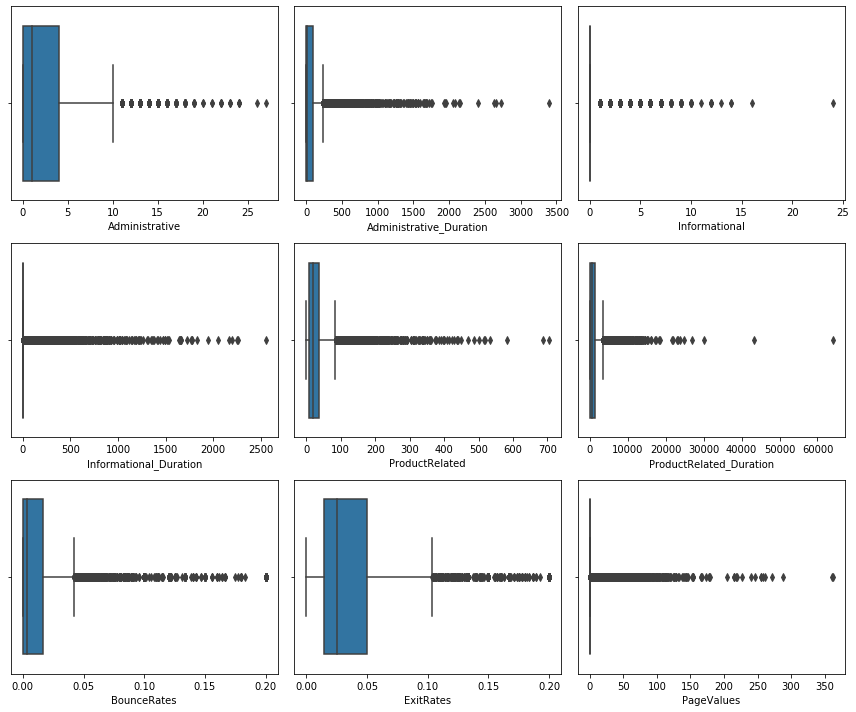

In [364]:
num_cols = data_num.columns
fig, ax = plt.subplots(3,3,figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data_num[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

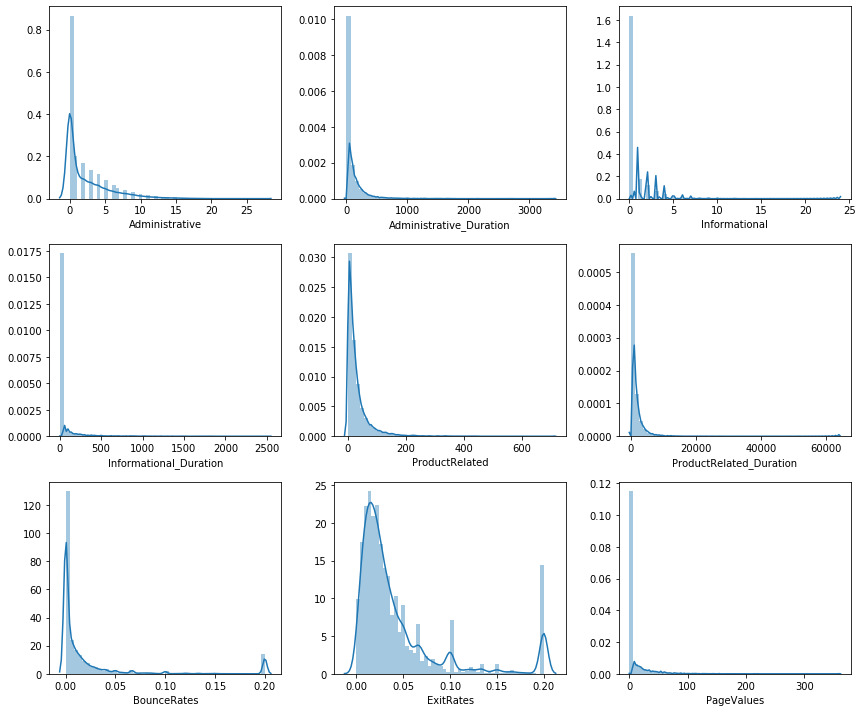

In [365]:
num_cols = data_num.columns
fig, ax = plt.subplots(3,3,figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.distplot(data_num[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

Administrative

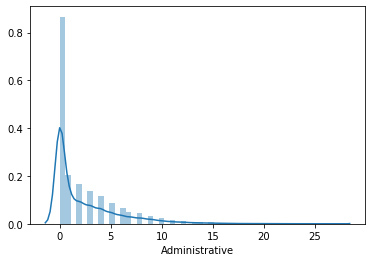

In [366]:
sns.distplot(data_num['Administrative'])

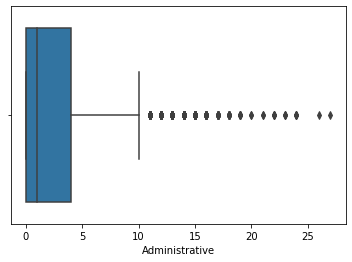

In [367]:
sns.boxplot(data_num['Administrative'])

In [368]:
data_num['Administrative']=np.sqrt(np.sqrt(data_num['Administrative']))

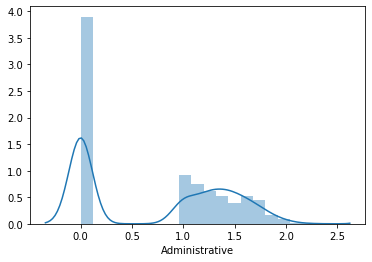

In [369]:
sns.distplot(data_num['Administrative'])

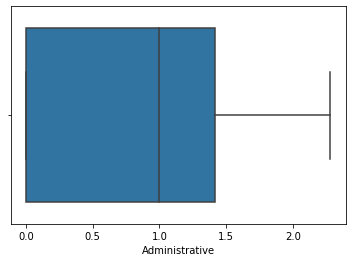

In [370]:
sns.boxplot(data_num['Administrative'])

Administrative Duration

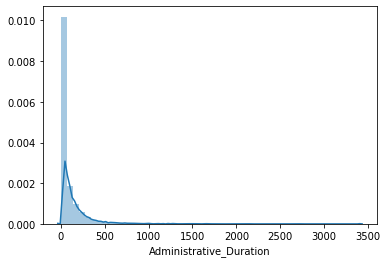

In [371]:
sns.distplot(data_num['Administrative_Duration'])

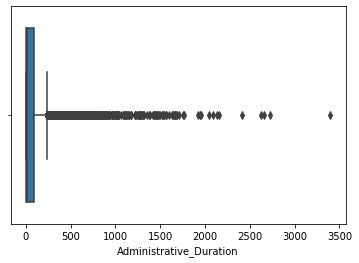

In [372]:
sns.boxplot(data_num['Administrative_Duration'])

In [373]:
data_num['Administrative_Duration'] = np.log1p(np.sqrt(data_num['Administrative_Duration']))

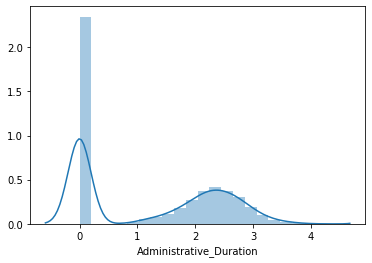

In [374]:
sns.distplot(data_num['Administrative_Duration'])

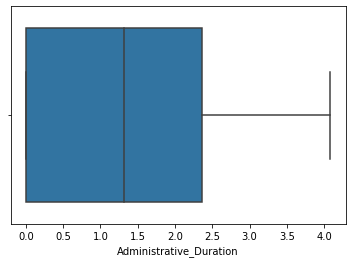

In [375]:
sns.boxplot(data_num['Administrative_Duration'])

In [376]:
data_num.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
dtype: int64

Informational

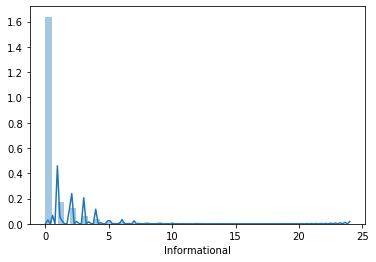

In [377]:
sns.distplot(data_num['Informational'])

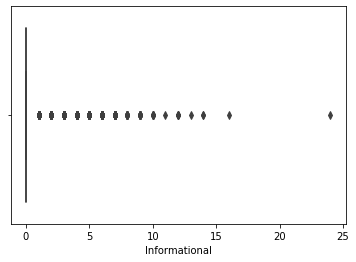

In [378]:
sns.boxplot(data_num['Informational'])

In [379]:
data_num['Informational'] = np.sqrt(np.sqrt(np.sqrt(data_num['Informational'])))

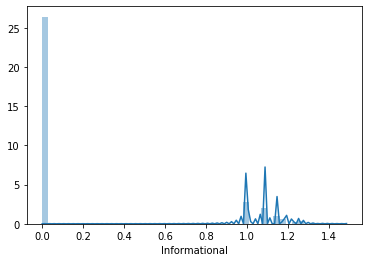

In [380]:
sns.distplot(data_num['Informational'])

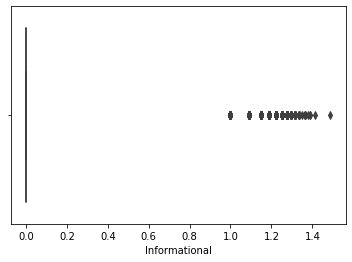

In [381]:
sns.boxplot(data_num['Informational'])

Informational Duration

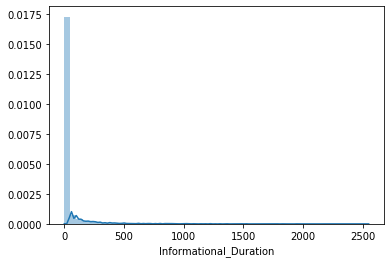

In [382]:
sns.distplot(data_num['Informational_Duration'])

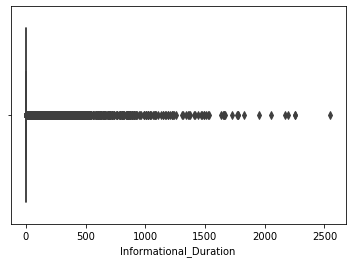

In [383]:
sns.boxplot(data_num['Informational_Duration'])

In [384]:
data_num['Informational_Duration'] = np.sqrt(np.sqrt(data_num['Informational_Duration']))

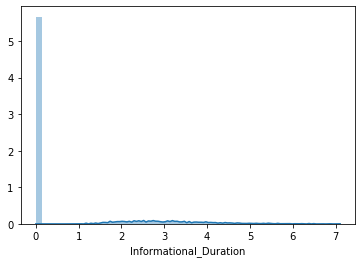

In [385]:
sns.distplot(data_num['Informational_Duration'])

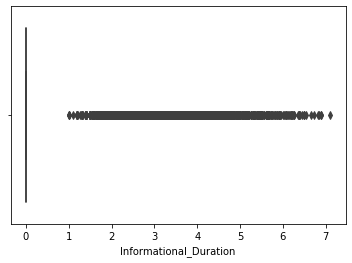

In [386]:
sns.boxplot(data_num['Informational_Duration'])

Product Related


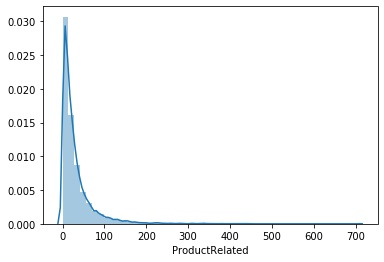

In [387]:
sns.distplot(data_num['ProductRelated'])

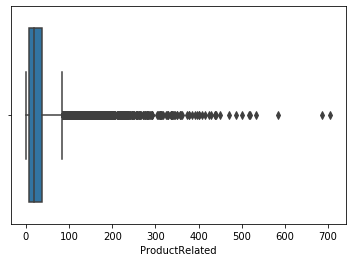

In [388]:
sns.boxplot(data_num['ProductRelated'])

In [389]:
data_num['ProductRelated']=np.sqrt(np.sqrt(data_num['ProductRelated']))

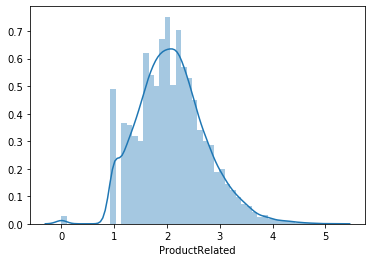

In [390]:
sns.distplot(data_num['ProductRelated'])

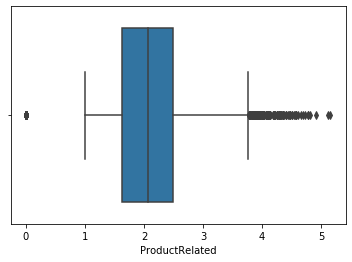

In [391]:
sns.boxplot(data_num['ProductRelated'])

Product Related Duration

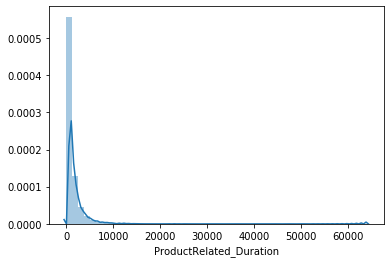

In [392]:
sns.distplot(data_num['ProductRelated_Duration'])

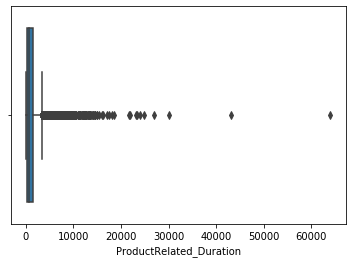

In [393]:
sns.boxplot(data_num['ProductRelated_Duration'])

In [394]:
data_num['ProductRelated_Duration']=np.sqrt(np.sqrt(np.sqrt(data_num['ProductRelated_Duration'])))

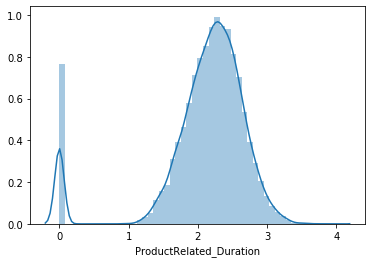

In [395]:
sns.distplot(data_num['ProductRelated_Duration'])

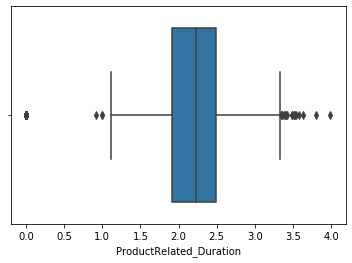

In [396]:
sns.boxplot(data_num['ProductRelated_Duration'])

Bounce Rates

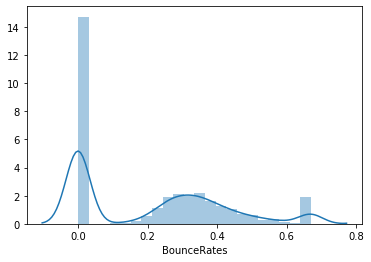

In [397]:
sns.distplot(np.sqrt(np.sqrt(data_num['BounceRates'])))

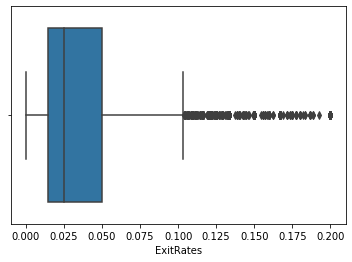

In [398]:
sns.boxplot(data_num['ExitRates'])

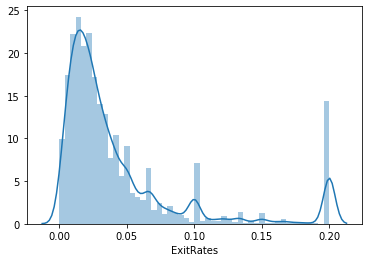

In [399]:
sns.distplot(data_num['ExitRates'])

In [400]:
data_num['ExitRates']= np.sqrt(np.sqrt(data_num['ExitRates']))

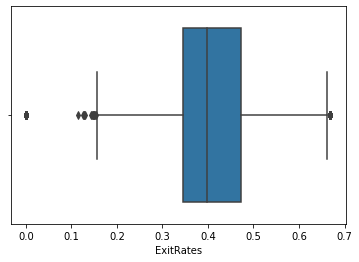

In [401]:
sns.boxplot(data_num['ExitRates'])

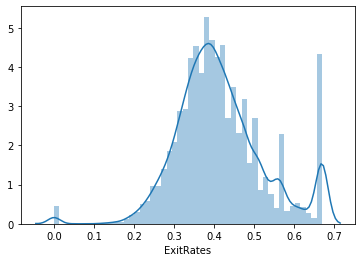

In [402]:
sns.distplot(data_num['ExitRates'])

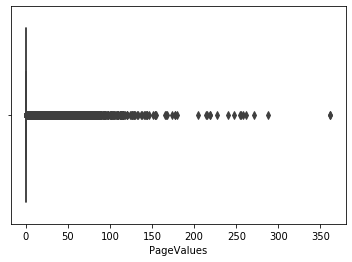

In [403]:
sns.boxplot(data_num['PageValues'])

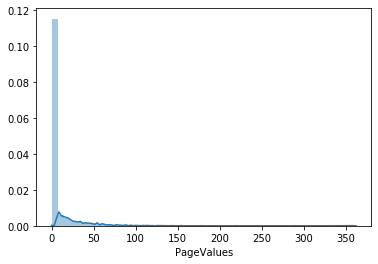

In [404]:
sns.distplot(data_num['PageValues'])

In [405]:
data_num['PageValues'] = np.sqrt(np.sqrt(np.sqrt(data_num['PageValues'])))

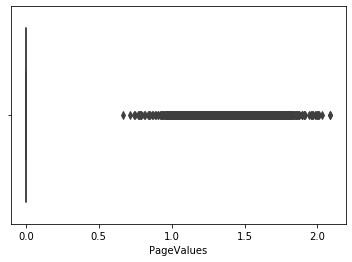

In [406]:
sns.boxplot(data_num['PageValues'])

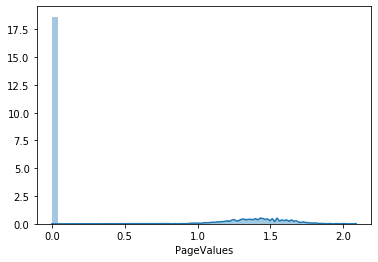

In [407]:
sns.distplot(data_num['PageValues'])

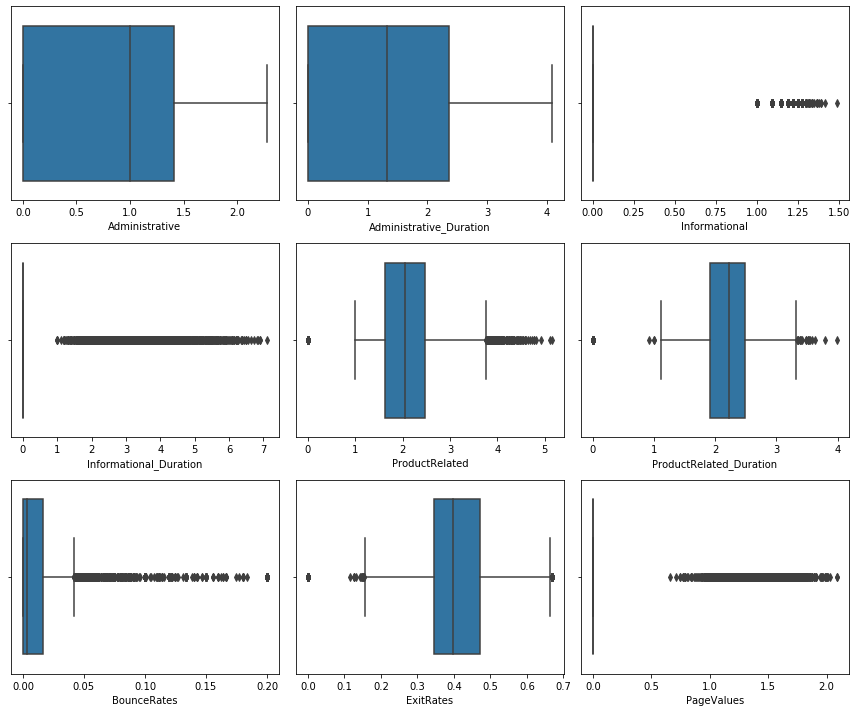

In [408]:
num_cols = data_num.columns
fig, ax = plt.subplots(3,3,figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data_num[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

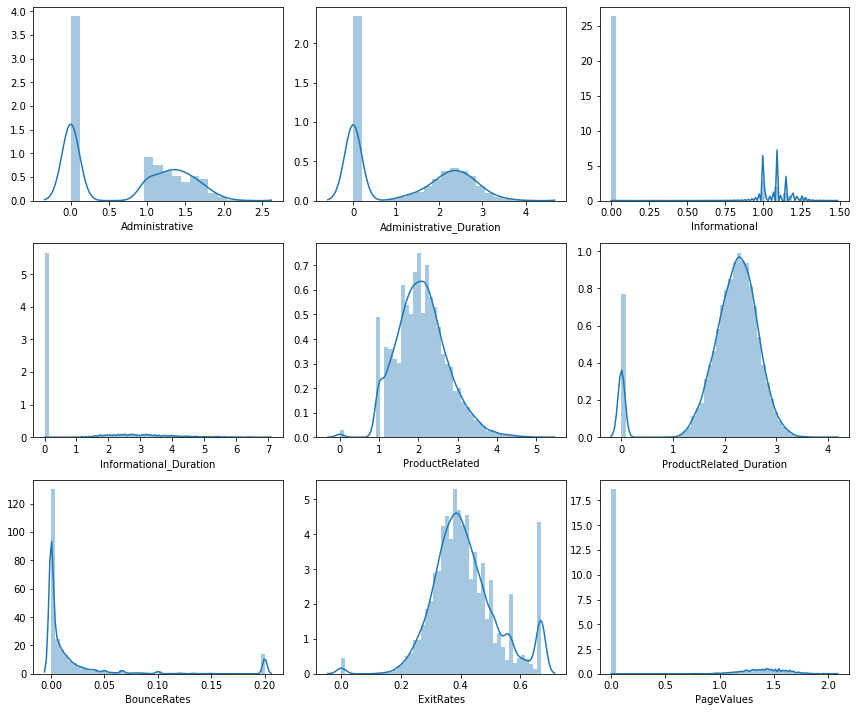

In [409]:
num_cols = data_num.columns
fig, ax = plt.subplots(3,3,figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.distplot(data_num[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

## Checking Multicollinearity between Independent Variables

In [410]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [411]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_num.values, i) for i in range(data_num.shape[1])]
vif["features"] = data_num.columns

In [412]:
vif

,VIF Factor,features
0,26.978954,Administrative
1,25.437579,Administrative_Duration
2,6.889263,Informational
3,6.504176,Informational_Duration
4,46.027983,ProductRelated
5,66.139016,ProductRelated_Duration
6,5.328297,BounceRates
7,18.369555,ExitRates
8,1.535551,PageValues


In [413]:
data_num = data_num.drop(['Administrative','Administrative_Duration','ProductRelated','ProductRelated_Duration','ExitRates'], axis=1)

In [414]:
data_num.columns

Index(['Informational', 'Informational_Duration', 'BounceRates', 'PageValues'], dtype='object')

In [415]:
newdata = pd.concat([data_cat_dum, data_cat_le, data_num], axis=1)

In [416]:
newdata

,Region,Browser,OperatingSystems,Weekend,Revenue,TrafficType,Month_Dec,Month_Feb,Month_Jul,Month_June,...,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,SpecialDay,Informational,Informational_Duration,BounceRates,PageValues
0,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0.0,0.0,0.200000,0.000000
1,1,2,2,0,0,2,0,1,0,0,...,0,0,0,0,1,0,0.0,0.0,0.000000,0.000000
2,9,1,4,0,0,3,0,1,0,0,...,0,0,0,0,1,0,0.0,0.0,0.200000,0.000000
3,2,2,3,0,0,4,0,1,0,0,...,0,0,0,0,1,0,0.0,0.0,0.050000,0.000000
4,1,3,3,1,0,4,0,1,0,0,...,0,0,0,0,1,0,0.0,0.0,0.020000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1,6,4,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0.0,0.0,0.007143,1.367667
12326,1,2,3,1,0,8,0,0,0,0,...,1,0,0,0,1,0,0.0,0.0,0.000000,0.000000
12327,1,2,3,1,0,13,0,0,0,0,...,1,0,0,0,1,0,0.0,0.0,0.083333,0.000000
12328,3,2,2,0,0,11,0,0,0,0,...,1,0,0,0,1,0,0.0,0.0,0.000000,0.000000


In [417]:
data1 = newdata

In [418]:
data1.shape

(12330, 22)

## Checking P-Value Through Logit Summary

In [419]:
X = data1.drop(columns=['Revenue'])
y = data1['Revenue']

In [420]:
import statsmodels.api as sm
Xc = sm.add_constant(X)
logit_model = sm.Logit(y,Xc)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.245939
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12308
Method:                           MLE   Df Model:                           21
Date:                Mon, 20 Jan 2020   Pseudo R-squ.:                  0.4292
Time:                        16:35:29   Log-Likelihood:                -3032.4
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.2895      0.212    -10.809      0.000      -2.705      -1.874
Region                           -0.0207      0.014     -1.459      0.144      -0.049       0.007
Browser                           0.0413      0.021      2.013      0.044       0.001       0.081
OperatingSystems                 -0.0601      0.042     -1.439      0.150      -0.142       0.022
Weekend                           0.1033      0.077      1.343      0.179      -0.047       0.254
TrafficType                       0.0104      0.009      1.159      0.246      -0.007       0.028
Month_Dec                        -0.4648      0.193     -2.410      0.016      -0.843      -0.087
Month_Feb                        -1.3238      0.658     -2.011      0.044      -2.614      -0.034
Month_Jul                         0.0397      0.239      0.166      0.868      -0.429       0.509
Month_June                       -0.3805      0.298     -1.276      0.202      -0.965       0.204
Month_Mar                        -0.4034      0.193     -2.086      0.037      -0.782      -0.024
Month_May                        -0.6654      0.185     -3.604      0.000      -1.027      -0.304
Month_Nov                         0.7949      0.178      4.474      0.000       0.447       1.143
Month_Oct                        -0.0839      0.217     -0.386      0.700      -0.510       0.342
Month_Sep                        -0.0384      0.229     -0.168      0.867      -0.488       0.411
VisitorType_Other                -0.4301      0.495     -0.869      0.385      -1.400       0.540
VisitorType_Returning_Visitor    -0.8954      0.093     -9.650      0.000      -1.077      -0.713
SpecialDay                       -0.0292      0.049     -0.590      0.555      -0.126       0.068
Informational                     0.1700      0.152      1.116      0.265      -0.129       0.469
Informational_Duration           -0.0942      0.049     -1.920      0.055      -0.190       0.002
BounceRates                     -15.9803      2.666     -5.994      0.000     -21.206     -10.755
PageValues                        2.5639      0.053     48.654      0.000       2.461       2.667
=================================================================================================
"""

### Dropping with Regards to P-Value

In [421]:
data1 = data1.drop(['Region','OperatingSystems','Weekend','TrafficType','Month_Jul','Month_June','Month_Oct','Month_Sep','Browser','VisitorType_Other','SpecialDay','Informational','Informational_Duration'], axis=1)

In [422]:
X = data1.drop(columns=['Revenue'])
y = data1['Revenue']

In [423]:
import statsmodels.api as sm
Xc = sm.add_constant(X)
logit_model = sm.Logit(y,Xc)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.246712
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12321
Method:                           MLE   Df Model:                            8
Date:                Mon, 20 Jan 2020   Pseudo R-squ.:                  0.4274
Time:                        16:35:30   Log-Likelihood:                -3042.0
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.3928      0.108    -22.230      0.000      -2.604      -2.182
Month_Dec                        -0.4108      0.121     -3.388      0.001      -0.648      -0.173
Month_Feb                        -1.2762      0.637     -2.003      0.045      -2.525      -0.027
Month_Mar                        -0.3363      0.123     -2.739      0.006      -0.577      -0.096
Month_May                        -0.6094      0.102     -5.950      0.000      -0.810      -0.409
Month_Nov                         0.8651      0.096      9.014      0.000       0.677       1.053
VisitorType_Returning_Visitor    -0.9051      0.091     -9.993      0.000      -1.083      -0.728
BounceRates                     -16.2277      2.674     -6.068      0.000     -21.469     -10.987
PageValues                        2.5457      0.052     49.363      0.000       2.445       2.647
=================================================================================================
"""

# Train Test Split

In [424]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [425]:
X_train.shape

(8631, 8)

In [426]:
y_train.shape

(8631,)

In [427]:
y_train.value_counts()

0    7273
1    1358
Name: Revenue, dtype: int64

In [428]:
X_test.shape

(3699, 8)

In [429]:
data1['Month_Feb'].value_counts()

0    12146
1      184
Name: Month_Feb, dtype: int64

## Using MIN MAX SCALER

In [430]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.transform(X_test)

In [431]:
X_train = pd.DataFrame(X_train_minmax, columns = X_train.columns)
X_test= pd.DataFrame(X_test_minmax, columns = X_test.columns)

In [432]:
X_train.shape

(8631, 8)

In [433]:
X_test.head()

,Month_Dec,Month_Feb,Month_Mar,Month_May,Month_Nov,VisitorType_Returning_Visitor,BounceRates,PageValues
0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.621386
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000


## Recursive Feature Elimination

In [434]:
from sklearn.feature_selection import RFE

In [435]:
model = LogisticRegression()
rfe = RFE(model)

In [436]:
X_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_rfe, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [437]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True])

In [438]:
rfe.ranking_

array([4, 2, 5, 3, 1, 1, 1, 1])

In [439]:
pd.DataFrame([X_train.columns, rfe.ranking_]).T

,0,1
0,Month_Dec,4
1,Month_Feb,2
2,Month_Mar,5
3,Month_May,3
4,Month_Nov,1
5,VisitorType_Returning_Visitor,1
6,BounceRates,1
7,PageValues,1


In [440]:
no_of_cols = len(X_train.columns)
score_list = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

for n in range(no_of_cols):
    model = LinearRegression()
    rfe = RFE(model, n+1)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_rfe, y_train)
    
    X_test_rfe = rfe.transform(X_test)
    score= model.score(X_test_rfe, y_test)
    
    score_list.append(score)

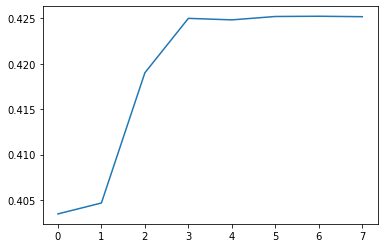

In [441]:
plt.plot(range(no_of_cols), score_list)

#### Selecting 4 Best Features

In [442]:
model = LogisticRegression()
rfe = RFE(model,4)

In [443]:
X_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_rfe, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [444]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True])

In [445]:
rfe.ranking_

array([4, 2, 5, 3, 1, 1, 1, 1])

In [446]:
sel= pd.DataFrame([X_train.columns, rfe.ranking_]).T
sel.columns = ['cols', 'select']
sel = sel[sel['select']==1]
sel

,cols,select
4,Month_Nov,1
5,VisitorType_Returning_Visitor,1
6,BounceRates,1
7,PageValues,1


In [447]:
selected_columns = sel['cols'].tolist()
selected_columns

['Month_Nov', 'VisitorType_Returning_Visitor', 'BounceRates', 'PageValues']

In [448]:
X_train = X_train.loc[:,selected_columns]
X_test = X_test.loc[:,selected_columns]

In [449]:
X_test

,Month_Nov,VisitorType_Returning_Visitor,BounceRates,PageValues
5466,0,1,0.075000,0.000000
2826,0,1,0.018182,0.000000
4508,0,0,0.018182,0.000000
4561,0,1,0.040000,0.000000
11110,0,1,0.200000,0.000000
...,...,...,...,...
6922,1,1,0.013333,1.455476
8725,1,1,0.011608,0.000000
1686,0,1,0.000000,0.000000
1620,0,0,0.000000,0.000000


## Checking All Models on Selected Features

### Generic Code for Evaluation of Models

In [450]:
def model_fit(algo, X_train, y_train, X_test, y_test):
    #for train Data
    
    algo.fit(X_train, y_train)
    y_train_pred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,1]
    print('AUC score of Train:', roc_auc_score(y_train, y_train_prob))
    fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
    print(confusion_matrix(y_train, y_train_pred))
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    #For test Data
    
    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('AUC score of Test:', roc_auc_score(y_test, y_test_prob))
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
    print(confusion_matrix(y_test, y_test_pred))
    
    
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    print(cohen_kappa_score(y_test, y_test_pred))

In [451]:
def evaluate_model(model, X, y):
    
    
    ypred = model.predict(X)
    cm = confusion_matrix(y, ypred)
    tp = cm[0,0]
    tn = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    f1 = 2*precision*recall / (precision+recall)
    print('Accuracy =',accuracy)
    print('Precision =', precision)
    print('Recall =', recall)
    print('F1 Score =', f1)


## Logistic Regression

AUC score of Train: 0.9108788560427746
[[6962  328]
 [ 562  779]]


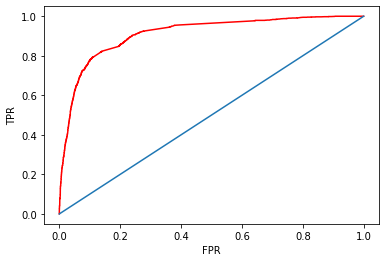

815
AUC score of Test: 0.9190742542700823
[[2975  157]
 [ 219  348]]


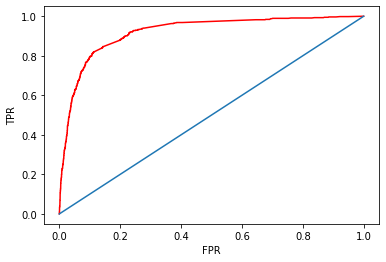

350
0.5900488643417638
Accuracy = 0.897323600973236
Precision = 0.9534638265208213
Recall = 0.9271319275984325
F1 Score = 0.9401135288552507


In [452]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state= 0)
model_fit(lr_model, X_train, y_train, X_test, y_test )
evaluate_model(lr_model, X.loc[:,selected_columns],y)

### Changing the Threshold and again Checking Accuracy

In [453]:
y_prob = result.predict(Xc)

In [545]:
y_prob

0        0.000402
1        0.010210
2        0.000402
3        0.004562
4        0.007401
           ...   
12325    0.415087
12326    0.080703
12327    0.022202
12328    0.080703
12329    0.178324
Length: 12330, dtype: float64

In [504]:
y_prob.describe()

count    12330.000000
mean         0.154745
std          0.240100
min          0.000402
25%          0.019699
50%          0.034220
75%          0.083722
max          0.977873
dtype: float64

Since, the default probability value to classify 0's and 1's is 0.5. Changing the threshild to 0.75

In [541]:
y_pred = y_prob.apply(lambda x :1 if x>=0.437 else 0)

In [542]:
y_pred

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Length: 12330, dtype: int64

In [543]:
y_pred.value_counts()

0    10425
1     1905
dtype: int64

In [544]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10422
           1       0.66      0.66      0.66      1908

    accuracy                           0.90     12330
   macro avg       0.80      0.80      0.80     12330
weighted avg       0.90      0.90      0.90     12330



### KNN

### Before Tuning

AUC score of Train: 0.9082311687222339
[[7006  284]
 [ 460  881]]


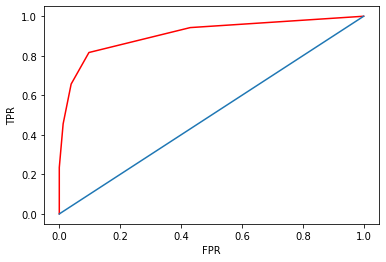

4
AUC score of Test: 0.8418219731012409
[[2942  190]
 [ 231  336]]


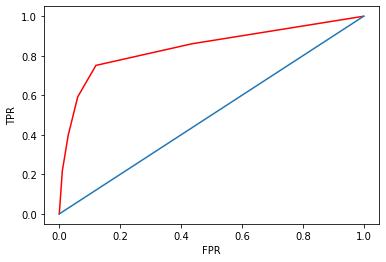

4
0.5481594058707864
Accuracy = 0.9055150040551501
Precision = 0.9545192861255037
Recall = 0.935050286681079
F1 Score = 0.9446844879160533


In [458]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_fit(knn, X_train, y_train, X_test, y_test )
evaluate_model(knn, X.loc[:,selected_columns],y)

In [459]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [460]:
param_grid = {'n_neighbors':range(5,20,5),
             'weights' : ['uniform', 'distance']
             }

In [461]:
gs = GridSearchCV(knn, param_grid=param_grid, cv=3)
gs.fit(X.loc[:,selected_columns],y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(5, 20, 5),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [462]:
gs.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

## After Tuning 

AUC score of Train: 0.9112459325953954
[[7050  240]
 [ 563  778]]


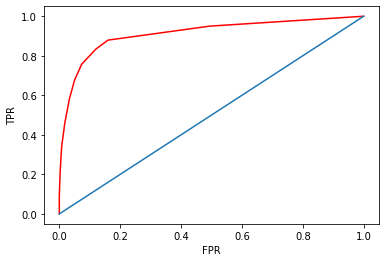

9
AUC score of Test: 0.8806446399571133
[[2990  142]
 [ 251  316]]


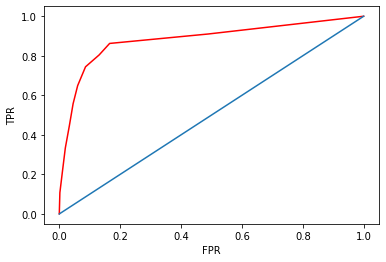

9
0.5557270049261896
Accuracy = 0.9030008110300081
Precision = 0.9633467664555747
Recall = 0.9250046065966464
F1 Score = 0.9437864260199285


In [463]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(**gs.best_params_)
model_fit(knn, X_train, y_train, X_test, y_test )
evaluate_model(knn, X.loc[:,selected_columns],y)

In [464]:
rs = RandomizedSearchCV(knn,param_distributions = param_grid, cv=5)
rs.fit(X.loc[:,selected_columns],y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=10,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': range(5, 20, 5),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

AUC score of Train: 0.9173193949604589
[[6969  321]
 [ 508  833]]


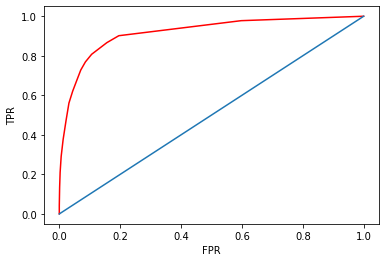

13
AUC score of Test: 0.8988120578158892
[[2963  169]
 [ 223  344]]


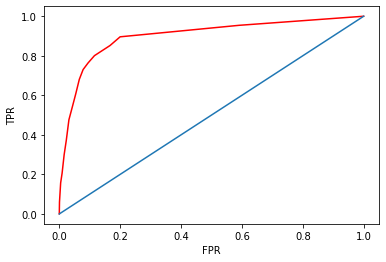

14
0.5751736358314743
Accuracy = 0.9009732360097323
Precision = 0.9529840721550566
Recall = 0.931445184282097
F1 Score = 0.942091534266066


In [465]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(**rs.best_params_)
model_fit(knn, X_train, y_train, X_test, y_test )
evaluate_model(knn, X.loc[:,selected_columns],y)

## Naive Bayes Classifier

AUC score of Train: 0.9007685745236496
[[6315  975]
 [ 256 1085]]


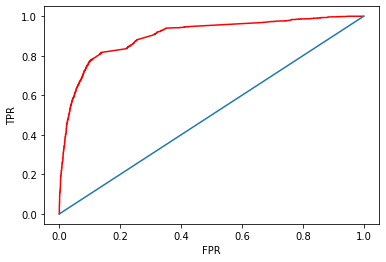

829
AUC score of Test: 0.9110972022317276
[[2707  425]
 [  94  473]]


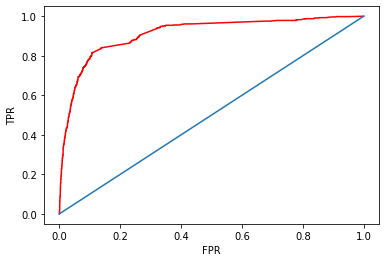

352
0.5637558362834302
Accuracy = 0.8580697485806975
Precision = 0.865668777585876
Recall = 0.962654716175843
F1 Score = 0.911589370516318


In [466]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_fit(nb, X_train, y_train, X_test, y_test )
evaluate_model(nb, X.loc[:,selected_columns],y)

## Decision Tree 

## Before Tuning

AUC score of Train: 0.9846297881829685
[[7290    0]
 [ 190 1151]]


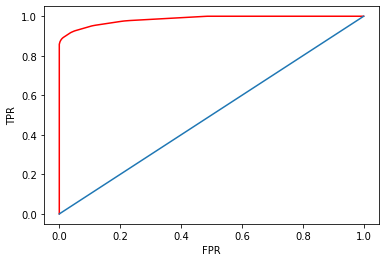

10
AUC score of Test: 0.7033129036109027
[[2931  201]
 [ 247  320]]


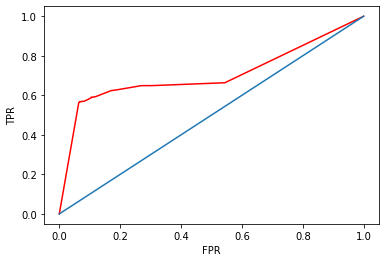

3
0.5173856291380314
Accuracy = 0.9482562854825628
Precision = 0.9807138744962579
Recall = 0.9589979358228561
F1 Score = 0.9697343453510436


In [467]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
model_fit(dt, X_train, y_train, X_test, y_test )
evaluate_model(dt, X.loc[:,selected_columns],y)

In [468]:
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[8,10,12],
             'min_samples_leaf':range(100,300,50),
             'min_samples_split':range(6,14,1),
             }

In [469]:
rs = RandomizedSearchCV(dt,param_distributions = param_grid, cv=3)
rs.fit(X.loc[:,selected_columns],y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=0,
                                                    splitter='best'),
 

In [470]:
rs.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 100,
 'max_depth': 10,
 'criterion': 'gini'}

### After Tuning

AUC score of Train: 0.9208153426439945
[[7028  262]
 [ 571  770]]


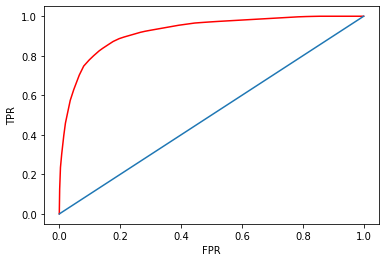

16
AUC score of Test: 0.9176735118625285
[[2997  135]
 [ 248  319]]


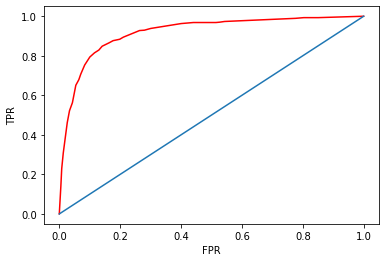

15
0.5656697762583913
Accuracy = 0.9013787510137875
Precision = 0.9619075033582806
Recall = 0.9244743637034305
F1 Score = 0.9428195241230133


In [471]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(**rs.best_params_,random_state=0)
model_fit(dt, X_train, y_train, X_test, y_test )
evaluate_model(dt, X.loc[:,selected_columns],y)

## Random Forest Hyper Parameter Tuning 

### Before Tuning

AUC score of Train: 0.9735200580202927
[[7268   22]
 [ 241 1100]]


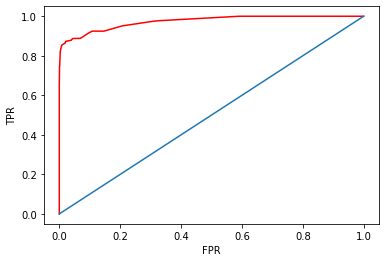

29
AUC score of Test: 0.8665285351641248
[[2969  163]
 [ 264  303]]


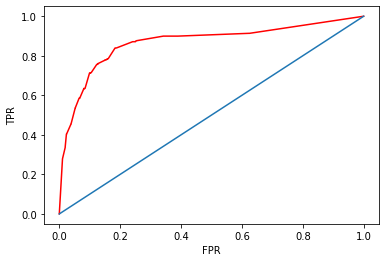

50
0.520299469450344
Accuracy = 0.9440389294403893
Precision = 0.982249088466705
Recall = 0.9529882703407186
F1 Score = 0.9673974673974673


In [472]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0)

model_fit(rf, X_train, y_train, X_test, y_test )
evaluate_model(rf, X.loc[:,selected_columns],y)

### After Tuning

In [473]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0)

In [474]:
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[6,8,10],
             'min_samples_leaf':range(10,50,10),
             'min_samples_split':range(2,4,1),
              'n_estimators' : [60,70,80,90]
             }

In [475]:
rs = RandomizedSearchCV(rf,param_distributions = param_grid, cv=3)
rs.fit(X.loc[:,selected_columns],y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [476]:
rs.best_params_

{'n_estimators': 70,
 'min_samples_split': 3,
 'min_samples_leaf': 40,
 'max_depth': 6,
 'criterion': 'entropy'}

AUC score of Train: 0.9218728422680695
[[7027  263]
 [ 573  768]]


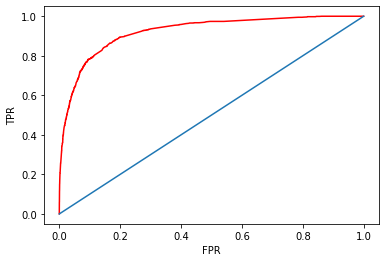

780
AUC score of Test: 0.9219587981827233
[[3008  124]
 [ 229  338]]


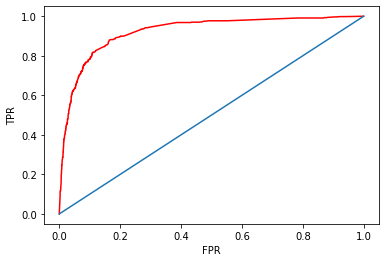

381
0.6021929932795367
Accuracy = 0.9035685320356853
Precision = 0.9628670120898101
Recall = 0.925994278859463
F1 Score = 0.9440707465073617


In [477]:
rf = RandomForestClassifier(**rs.best_params_,random_state = 0)

model_fit(rf, X_train, y_train, X_test, y_test )
evaluate_model(rf, X.loc[:,selected_columns],y)

### Ensemble Techniques with Base Model as Decision Tree

### Boosting Classifier

### Before Tuning

AUC score of Train: 0.9137625321070513
[[7013  277]
 [ 604  737]]


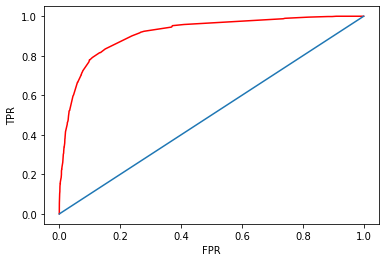

164
AUC score of Test: 0.9148886388669274
[[2988  144]
 [ 232  335]]


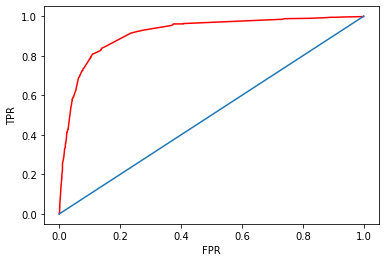

113
0.5818288089362256
Accuracy = 0.8980535279805353
Precision = 0.9596046824026099
Recall = 0.9228568792101135
F1 Score = 0.9408721012277153


In [478]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 0)
model_fit(ada, X_train, y_train, X_test, y_test )
evaluate_model(ada, X.loc[:,selected_columns],y)

In [479]:
param_grid = {'n_estimators' :range(30,40,2)
             }

In [480]:
ada = AdaBoostClassifier(random_state = 0)
rs = RandomizedSearchCV(ada,param_distributions = param_grid, cv=3)
rs.fit(X.loc[:,selected_columns],y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=0),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_estimators': range(30, 40, 2)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [481]:
rs.best_params_

{'n_estimators': 36}

AUC score of Train: 0.912016450676102
[[7017  273]
 [ 614  727]]


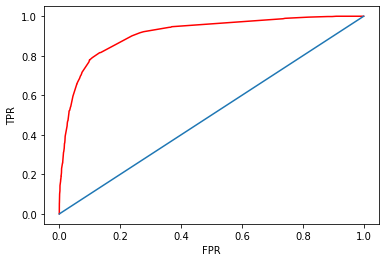

122
AUC score of Test: 0.9135915091640933
[[2993  139]
 [ 235  332]]


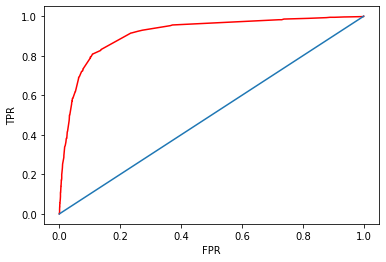

94
0.5814709534078286
Accuracy = 0.8977291159772912
Precision = 0.9604682402609864
Recall = 0.9218160051570126
F1 Score = 0.9407452657299938


In [482]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(**rs.best_params_,random_state = 0)
model_fit(ada, X_train, y_train, X_test, y_test )
evaluate_model(ada, X.loc[:,selected_columns],y)

## Bagging Classifier Hyperparameter Tuning

### Before Tuning

AUC score of Train: 0.9736087455975876
[[7268   22]
 [ 247 1094]]


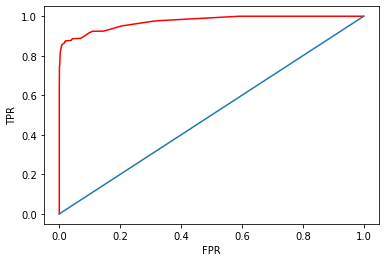

29
AUC score of Test: 0.8695423134014024
[[2974  158]
 [ 275  292]]


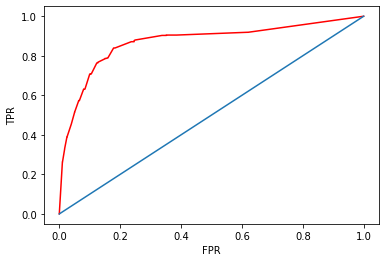

47
0.5074193093025767
Accuracy = 0.9430656934306569
Precision = 0.9827288428324698
Recall = 0.9515050167224081
F1 Score = 0.9668649107901445


In [483]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(random_state = 0)

model_fit(bc, X_train, y_train, X_test, y_test )
evaluate_model(bc, X.loc[:,selected_columns],y)

In [484]:
param_grid = {'n_estimators' :range(2,10,2)
             }

In [485]:
gs = GridSearchCV(bc, param_grid=param_grid, cv=3)
gs.fit(X.loc[:,selected_columns],y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=0,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': range(2, 10, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [486]:
gs.best_params_

{'n_estimators': 4}

AUC score of Train: 0.970672849223958
[[7258   32]
 [ 355  986]]


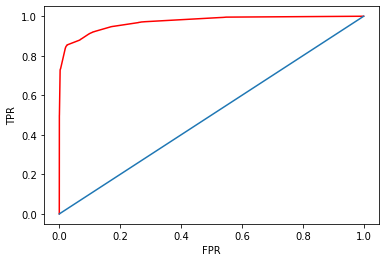

27
AUC score of Test: 0.8360024867049133
[[3007  125]
 [ 303  264]]


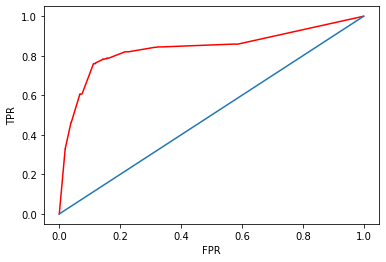

15
0.4884938150984873
Accuracy = 0.9339010543390105
Precision = 0.9849357129149875
Recall = 0.9397601391559095
F1 Score = 0.9618177559147341


In [487]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(**gs.best_params_,random_state = 0)

model_fit(bc, X_train, y_train, X_test, y_test )
evaluate_model(bc, X.loc[:,selected_columns],y)

In [488]:
rs = RandomizedSearchCV(bc,param_distributions = param_grid, cv=3)
rs.fit(X.loc[:,selected_columns],y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BaggingClassifier(base_estimator=None,
                                               bootstrap=True,
                                               bootstrap_features=False,
                                               max_features=1.0,
                                               max_samples=1.0, n_estimators=4,
                                               n_jobs=None, oob_score=False,
                                               random_state=0, verbose=0,
                                               warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_estimators': range(2, 10, 2)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [489]:
rs.best_params_

{'n_estimators': 4}

AUC score of Train: 0.970672849223958
[[7258   32]
 [ 355  986]]


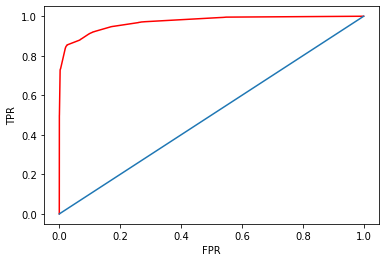

27
AUC score of Test: 0.8360024867049133
[[3007  125]
 [ 303  264]]


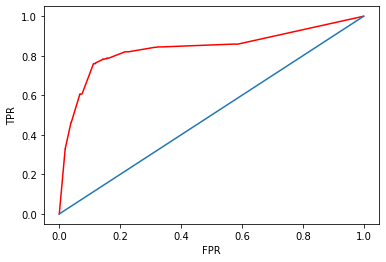

15
0.4884938150984873
Accuracy = 0.9339010543390105
Precision = 0.9849357129149875
Recall = 0.9397601391559095
F1 Score = 0.9618177559147341


In [490]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(**rs.best_params_,random_state = 0)

model_fit(bc, X_train, y_train, X_test, y_test )
evaluate_model(bc, X.loc[:,selected_columns],y)

## Balancing the Data -  SMOTE

In [491]:
from imblearn.over_sampling import SMOTE

In [492]:
y_train.shape

(8631,)

In [493]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [494]:
np.bincount(y_train)

array([7290, 7290], dtype=int64)

In [495]:
y_train.shape

(14580,)

In [496]:
X_train  = pd.DataFrame(X_train, columns =selected_columns)

In [497]:
X_test = pd.DataFrame(X_test, columns = selected_columns)

In [498]:
X_train.shape

(14580, 4)

In [499]:
X_test.shape

(3699, 4)

In [500]:
y_train.shape

(14580,)

In [501]:
y_test.shape

(3699,)

In [502]:
X_train

,Month_Nov,VisitorType_Returning_Visitor,BounceRates,PageValues
0,0.0,1.0,0.003922,0.000000
1,0.0,1.0,0.004000,0.000000
2,1.0,1.0,0.012500,0.000000
3,0.0,1.0,0.000000,0.000000
4,1.0,1.0,0.008671,1.146360
...,...,...,...,...
14575,0.0,0.0,0.000000,1.716574
14576,1.0,1.0,0.000000,1.400633
14577,0.0,1.0,0.017149,0.000000
14578,1.0,1.0,0.005294,1.175551


## Logistic Regression

AUC score of Train: 0.9107322920136006
[[6269 1021]
 [1277 6013]]


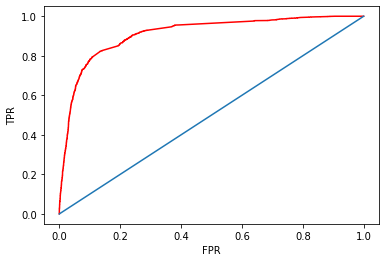

1253
AUC score of Test: 0.9186096864364213
[[2687  445]
 [  90  477]]


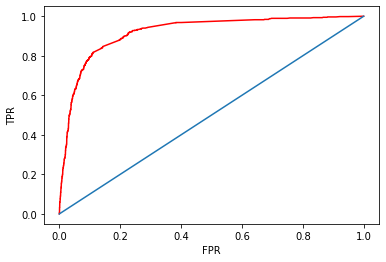

356
0.5565109004108453
Accuracy = 0.8544201135442011
Precision = 0.8593360199577816
Recall = 0.9645665051157781
F1 Score = 0.9089156137413102


In [503]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state= 0)
model_fit(lr_model, X_train, y_train, X_test, y_test )
evaluate_model(lr_model, X.loc[:,selected_columns],y)

### KNN

### Before Tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_fit(knn, X_train, y_train, X_test, y_test )
evaluate_model(knn, X.loc[:,selected_columns],y)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [158]:
param_grid = {'n_neighbors':range(5,20,5),
             'weights' : ['uniform', 'distance']
             }

In [159]:
gs = GridSearchCV(knn, param_grid=param_grid, cv=3)
gs.fit(X.loc[:,selected_columns],y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=15, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(5, 20, 5),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [160]:
gs.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

## After Tuning 

AUC score of Train: 0.9303300178194758
[[6505  785]
 [1090 6200]]


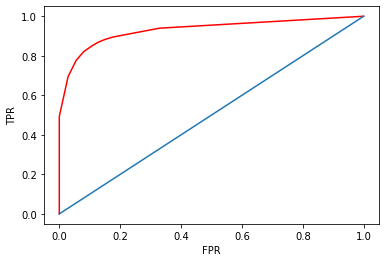

5
AUC score of Test: 0.8910064735415949
[[2752  380]
 [ 122  445]]


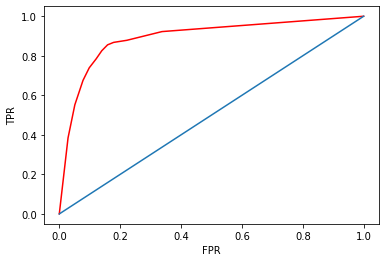

7
0.5592935778640726
Accuracy = 0.8776966747769668
Precision = 0.8882172327768183
Recall = 0.9642708333333333
F1 Score = 0.9246828488662471


In [161]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(**gs.best_params_)
model_fit(knn, X_train, y_train, X_test, y_test )
evaluate_model(knn, X.loc[:,selected_columns],y)

In [162]:
rs = RandomizedSearchCV(knn,param_distributions = param_grid, cv=5)
rs.fit(X.loc[:,selected_columns],y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=10,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': range(5, 20, 5),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

AUC score of Train: 0.9320155482922847
[[6389  901]
 [1036 6254]]


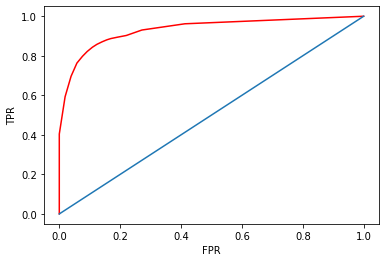

7
AUC score of Test: 0.8981726435430138
[[2718  414]
 [ 102  465]]


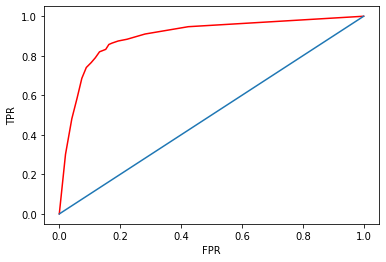

10
0.5614204883859439
Accuracy = 0.8683698296836982
Precision = 0.8738246018038764
Recall = 0.9672862453531599
F1 Score = 0.9181831930231386


In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(**rs.best_params_)
model_fit(knn, X_train, y_train, X_test, y_test )
evaluate_model(knn, X.loc[:,selected_columns],y)

## Naive Bayes Classifier

AUC score of Train: 0.9017648055005164
[[4983 2307]
 [ 608 6682]]


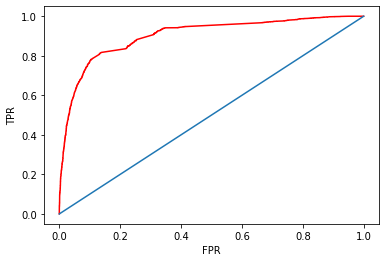

1306
AUC score of Test: 0.9095356911981007
[[2121 1011]
 [  34  533]]


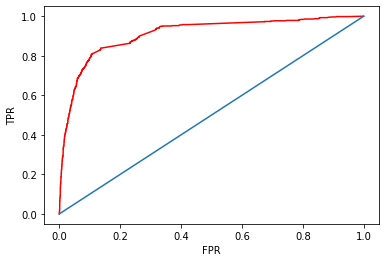

381
0.36189321578363254
Accuracy = 0.7184103811841038
Precision = 0.6816350028785262
Recall = 0.9787820336180766
F1 Score = 0.8036199095022624


In [164]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_fit(nb, X_train, y_train, X_test, y_test )
evaluate_model(nb, X.loc[:,selected_columns],y)

## Decision Tree 

## Before Tuning

AUC score of Train: 0.9882996701421229
[[7278   12]
 [ 700 6590]]


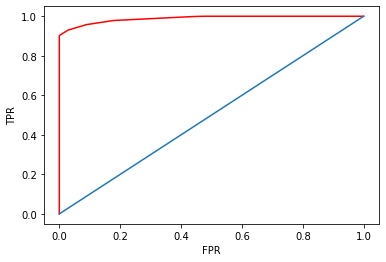

3
AUC score of Test: 0.7526519784395476
[[2802  330]
 [ 194  373]]


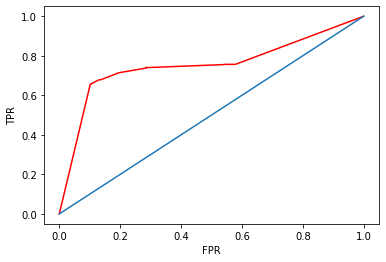

1
0.5030734300586998
Accuracy = 0.9416869424168695
Precision = 0.9671848013816926
Recall = 0.9639475949124988
F1 Score = 0.965563484841228


In [165]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
model_fit(dt, X_train, y_train, X_test, y_test )
evaluate_model(dt, X.loc[:,selected_columns],y)

In [166]:
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[8,10,12],
             'min_samples_leaf':range(100,300,50),
             'min_samples_split':range(6,14,1),
             }

In [167]:
rs = RandomizedSearchCV(dt,param_distributions = param_grid, cv=3)
rs.fit(X.loc[:,selected_columns],y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=0,
                                                    splitter='best'),
 

In [168]:
rs.best_params_

{'min_samples_split': 13,
 'min_samples_leaf': 100,
 'max_depth': 12,
 'criterion': 'gini'}

### After Tuning

AUC score of Train: 0.927173289226838
[[6312  978]
 [1172 6118]]


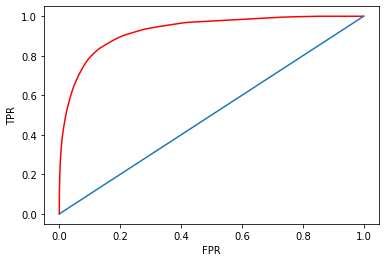

52
AUC score of Test: 0.9188926504805601
[[2707  425]
 [  88  479]]


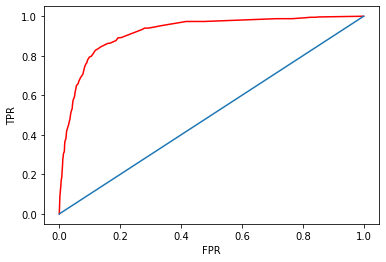

52
0.5703018482627065
Accuracy = 0.8606650446066505
Precision = 0.8653809249664172
Recall = 0.9662524105421041
F1 Score = 0.9130390767361815


In [169]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(**rs.best_params_,random_state=0)
model_fit(dt, X_train, y_train, X_test, y_test )
evaluate_model(dt, X.loc[:,selected_columns],y)

## Random Forest Hyper Parameter Tuning 

### Before Tuning

AUC score of Train: 0.9806133324301287
[[7224   66]
 [ 763 6527]]


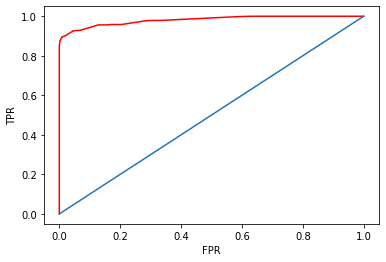

30
AUC score of Test: 0.8731130099265476
[[2787  345]
 [ 170  397]]


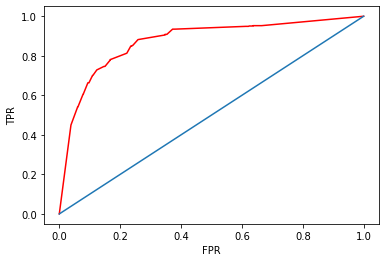

34
0.5238207722263091
Accuracy = 0.9376317923763179
Precision = 0.9605641911341393
Recall = 0.9654740090654836
F1 Score = 0.9630128420951374


In [170]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0)

model_fit(rf, X_train, y_train, X_test, y_test )
evaluate_model(rf, X.loc[:,selected_columns],y)

### After Tuning

In [171]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0)

In [172]:
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[6,8,10],
             'min_samples_leaf':range(10,50,10),
             'min_samples_split':range(2,4,1),
              'n_estimators' : [60,70,80,90]
             }

In [173]:
rs = RandomizedSearchCV(rf,param_distributions = param_grid, cv=3)
rs.fit(X.loc[:,selected_columns],y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [174]:
rs.best_params_

{'n_estimators': 80,
 'min_samples_split': 3,
 'min_samples_leaf': 40,
 'max_depth': 10,
 'criterion': 'entropy'}

AUC score of Train: 0.9313340427253449
[[6235 1055]
 [1076 6214]]


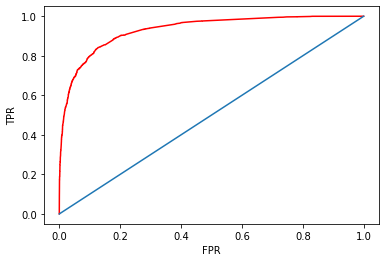

2022
AUC score of Test: 0.9216623194379687
[[2673  459]
 [  78  489]]


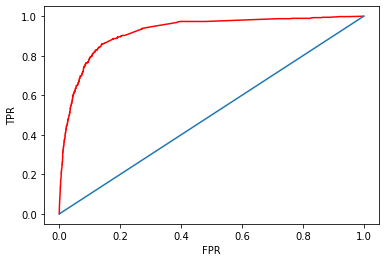

425
0.5614079015613542
Accuracy = 0.8543390105433901
Precision = 0.8547303780464403
Recall = 0.9693144722524483
F1 Score = 0.908423414236182


In [175]:
rf = RandomForestClassifier(**rs.best_params_,random_state = 0)

model_fit(rf, X_train, y_train, X_test, y_test )
evaluate_model(rf, X.loc[:,selected_columns],y)

### Ensemble Techniques with Base Model as Decision Tree

### Boosting Classifier

### Before Tuning

AUC score of Train: 0.9185327534006598
[[6279 1011]
 [1289 6001]]


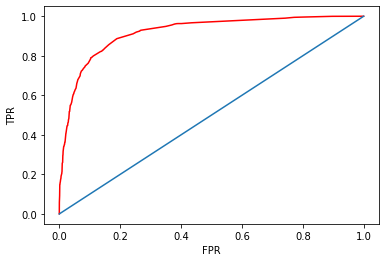

317
AUC score of Test: 0.9197330959250926
[[2688  444]
 [  89  478]]


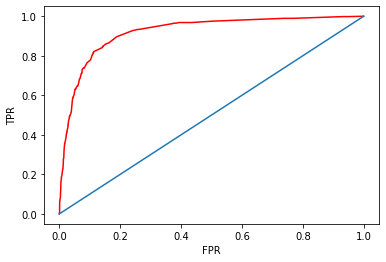

173
0.5581688035868795
Accuracy = 0.8555555555555555
Precision = 0.860391479562464
Recall = 0.9649198321317121
F1 Score = 0.9096626933806746


In [176]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 0)
model_fit(ada, X_train, y_train, X_test, y_test )
evaluate_model(ada, X.loc[:,selected_columns],y)

In [177]:
param_grid = {'n_estimators' :range(30,40,2)
             }

In [178]:
ada = AdaBoostClassifier(random_state = 0)
rs = RandomizedSearchCV(ada,param_distributions = param_grid, cv=3)
rs.fit(X.loc[:,selected_columns],y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=0),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_estimators': range(30, 40, 2)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [179]:
rs.best_params_

{'n_estimators': 36}

AUC score of Train: 0.916053898739465
[[6302  988]
 [1308 5982]]


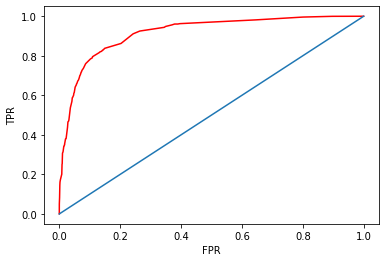

223
AUC score of Test: 0.9194720932694538
[[2695  437]
 [  89  478]]


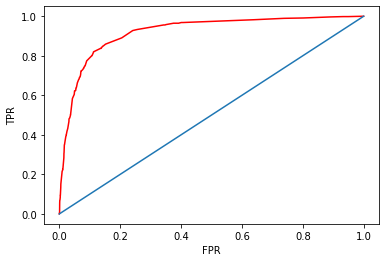

127
0.5622099098442322
Accuracy = 0.8574209245742093
Precision = 0.8632700057570524
Recall = 0.9643086816720258
F1 Score = 0.9109963547995141


In [180]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(**rs.best_params_,random_state = 0)
model_fit(ada, X_train, y_train, X_test, y_test )
evaluate_model(ada, X.loc[:,selected_columns],y)

## Bagging Classifier Hyperparameter Tuning

### Before Tuning

AUC score of Train: 0.98073677981187
[[7227   63]
 [ 754 6536]]


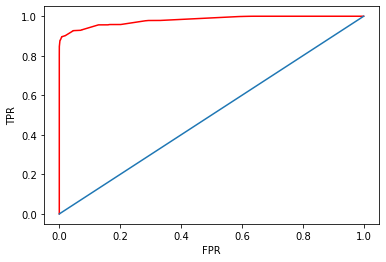

29
AUC score of Test: 0.8728795997846659
[[2788  344]
 [ 180  387]]


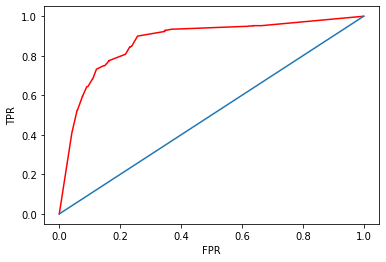

36
0.5120578559582393
Accuracy = 0.9375506893755069
Precision = 0.9609479946267511
Recall = 0.9650221622663326
F1 Score = 0.9629807692307691


In [181]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(random_state = 0)

model_fit(bc, X_train, y_train, X_test, y_test )
evaluate_model(bc, X.loc[:,selected_columns],y)

In [182]:
param_grid = {'n_estimators' :range(2,10,2)
             }

In [183]:
gs = GridSearchCV(bc, param_grid=param_grid, cv=3)
gs.fit(X.loc[:,selected_columns],y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=0,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': range(2, 10, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [184]:
gs.best_params_

{'n_estimators': 4}

AUC score of Train: 0.9786867121656027
[[7203   87]
 [ 912 6378]]


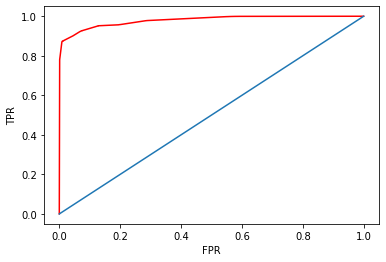

18
AUC score of Test: 0.8586221537477391
[[2832  300]
 [ 204  363]]


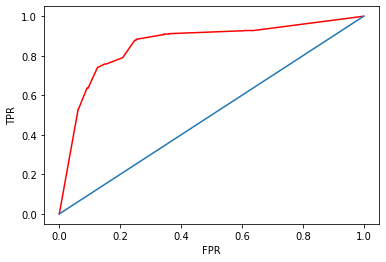

20
0.5091281351305237
Accuracy = 0.9343876723438768
Precision = 0.9628670120898101
Recall = 0.9596442574352109
F1 Score = 0.9612529335696154


In [185]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(**gs.best_params_,random_state = 0)

model_fit(bc, X_train, y_train, X_test, y_test )
evaluate_model(bc, X.loc[:,selected_columns],y)

In [186]:
rs = RandomizedSearchCV(bc,param_distributions = param_grid, cv=3)
rs.fit(X.loc[:,selected_columns],y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BaggingClassifier(base_estimator=None,
                                               bootstrap=True,
                                               bootstrap_features=False,
                                               max_features=1.0,
                                               max_samples=1.0, n_estimators=4,
                                               n_jobs=None, oob_score=False,
                                               random_state=0, verbose=0,
                                               warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_estimators': range(2, 10, 2)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [187]:
rs.best_params_

{'n_estimators': 4}

AUC score of Train: 0.9786867121656027
[[7203   87]
 [ 912 6378]]


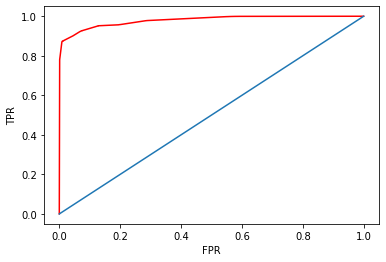

18
AUC score of Test: 0.8586221537477391
[[2832  300]
 [ 204  363]]


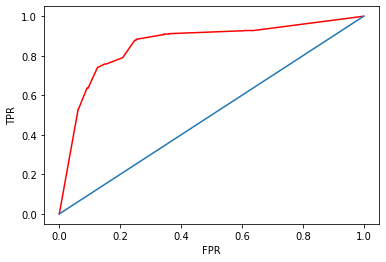

20
0.5091281351305237
Accuracy = 0.9343876723438768
Precision = 0.9628670120898101
Recall = 0.9596442574352109
F1 Score = 0.9612529335696154


In [188]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(**rs.best_params_,random_state = 0)

model_fit(bc, X_train, y_train, X_test, y_test )
evaluate_model(bc, X.loc[:,selected_columns],y)